In [1]:
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
d = os.path.dirname(os.getcwd())
sys.path.insert(0, d)

In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import torchvision
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms

from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt

from utils.attacks import fgsm, pgd
from utils.utils import plot_images
from models.resnet import resnet18, sparse_resnet18

1.7.0
True


In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [4]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

ds = CIFAR10('../data', train=False, target_transform=None, download=True, transform=test_transform)
test_loader = DataLoader(ds, 26, shuffle=True)
for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    break

Files already downloaded and verified


# ResNet18 vs Sparse ResNet18

## On clean image

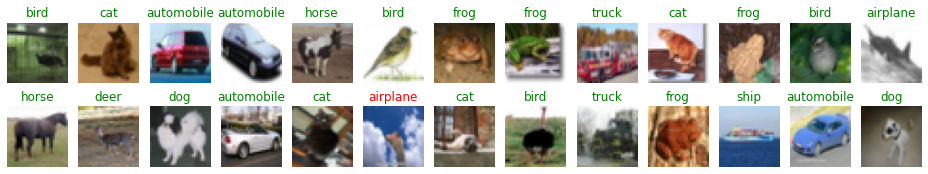

In [5]:
model = resnet18().to(device)
model.load_state_dict(torch.load("../saved/resnet18.pt", map_location=device))

plot_images(X, y, model(X), 2, 13, ds.classes)

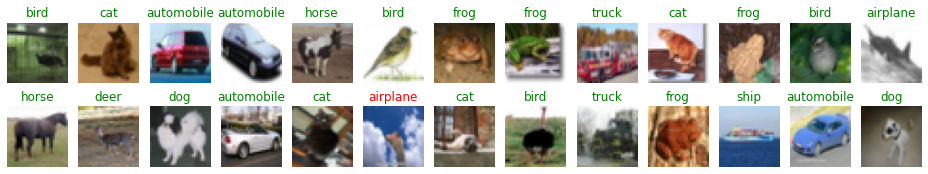

In [6]:
model = sparse_resnet18().to(device)
model.load_state_dict(torch.load("../saved/sparse_resnet18.pt", map_location=device))

plot_images(X, y, model(X), 2, 13, ds.classes)

## On PDG attack

In [7]:
params = {
    "epsilon": 8/255,
    "alpha": 2/255,
    "num_iter": 10
}

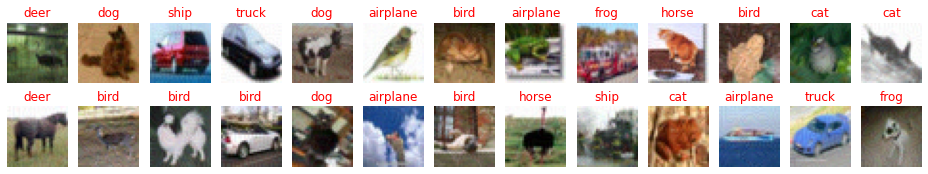

In [8]:
# ResNet 18
model = resnet18().to(device)
model.load_state_dict(torch.load("../saved/resnet18.pt", map_location=device))

noise = pgd(model, X, y, nn.CrossEntropyLoss(), epsilon=params["epsilon"],
            alpha=params["alpha"], num_iter=params["num_iter"])
plot_images(X+noise, y, model(X+noise), 2, 13, ds.classes)

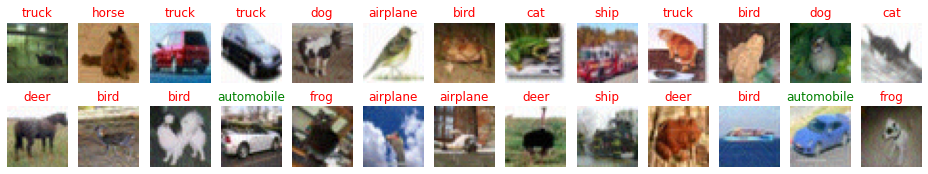

In [9]:
#  Sparse ResNet 18
model = sparse_resnet18().to(device)
model.load_state_dict(torch.load("../saved/sparse_resnet18.pt", map_location=device))

noise = pgd(model, X, y, nn.CrossEntropyLoss(), epsilon=params["epsilon"],
            alpha=params["alpha"], num_iter=params["num_iter"])
plot_images(X+noise, y, model(X+noise), 2, 13, ds.classes)

In [10]:
params = {
    "epsilon": 4/255,
    "alpha": 2/255,
    "num_iter": 10
}

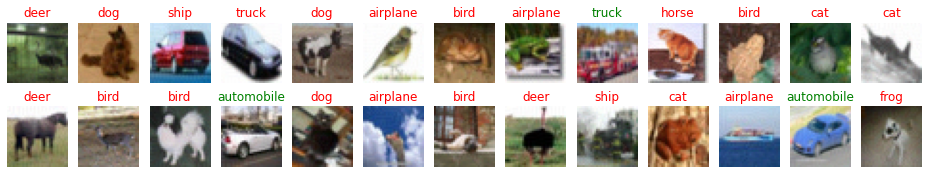

In [11]:
# ResNet 18
model = resnet18().to(device)
model.load_state_dict(torch.load("../saved/resnet18.pt", map_location=device))

noise = pgd(model, X, y, nn.CrossEntropyLoss(), epsilon=params["epsilon"],
            alpha=params["alpha"], num_iter=params["num_iter"])
plot_images(X+noise, y, model(X+noise), 2, 13, ds.classes)

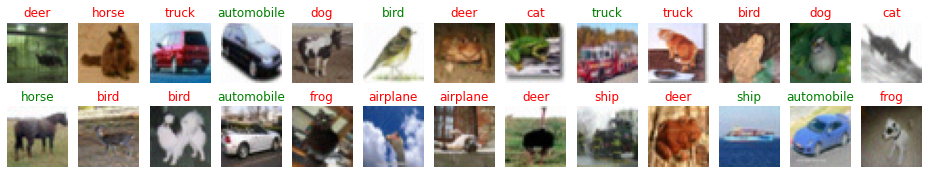

In [12]:
#  Sparse ResNet 18
model = sparse_resnet18().to(device)
model.load_state_dict(torch.load("../saved/sparse_resnet18.pt", map_location=device))

noise = pgd(model, X, y, nn.CrossEntropyLoss(), epsilon=params["epsilon"],
            alpha=params["alpha"], num_iter=params["num_iter"])
plot_images(X+noise, y, model(X+noise), 2, 13, ds.classes)